# 数值解
## 初始化
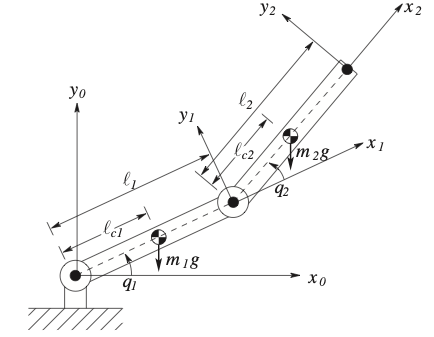

In [4]:
from roboticstoolbox import DHRobot, RevoluteDH, ERobot, ELink, ETS
from math import pi, sin, cos
import numpy as np
np.set_printoptions(linewidth=100, suppress=True)

# link 1
m1 = 1
l1 = 1
lc1 = 0.5

# link 2
m2 = 1
l2 = 1
lc2 = 0.5

# joint configurations
q1 = [0, 0]        # o-o- arm horizontal
q2 = [0, pi/2]    # o-o| upper arm horizontal, lower arm vertical
q3 = [pi/2, 0]    # o|o| arm vertical
q4 = [pi/2, -pi/2] # o|o- upper arm upward, lower arm horizontal
qq = [q1, q2, q3, q4]
z = [0, 0]

# global parameters
g = 9.81

## DH参数

In [2]:
L1 = RevoluteDH(a=l1, m=m1, r=[-lc1, 0, 0])
L2 = RevoluteDH(a=l2, m=m2, r=[-lc2, 0, 0])
robot = DHRobot([L1, L2], gravity=[0, g, 0])
print(robot)
print(robot.dynamics())


DHRobot: , 2 joints (RR), dynamics, standard DH parameters
┌─────┬────┬────┬──────┐
│ θⱼ  │ dⱼ │ aⱼ │  ⍺ⱼ  │
├─────┼────┼────┼──────┤
│  q1 │  0 │  1 │ 0.0° │
│  q2 │  0 │  1 │ 0.0° │
└─────┴────┴────┴──────┘

┌──┬──┐
└──┴──┘

┌───────┬────┬──────────────┬────────────────────────┬────┬────┬────────┬────┐
│   j   │ m  │      r       │           I            │ Jm │ B  │   Tc   │ G  │
├───────┼────┼──────────────┼────────────────────────┼────┼────┼────────┼────┤
│ link1 │  1 │ -0.5,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│ link2 │  1 │ -0.5,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
└───────┴────┴──────────────┴────────────────────────┴────┴────┴────────┴────┘

None


In [4]:
# 创建连杆
# 假设所有关节都是旋转关节 (Revolute)
"""
L1 = DHLink(a=0, alpha=0, d=0, theta=0)
L2 = DHLink(a=1, alpha=0, d=0, theta=0)
L3 = DHLink(a=1, alpha=0, d=0, theta=0)
yk_robot = DHRobot(links=[L1, L2, L3], name='Planar3LinkRobot')
print(yk_robot)
"""

"\nL1 = DHLink(a=0, alpha=0, d=0, theta=0)\nL2 = DHLink(a=1, alpha=0, d=0, theta=0)\nL3 = DHLink(a=1, alpha=0, d=0, theta=0)\nyk_robot = DHRobot(links=[L1, L2, L3], name='Planar3LinkRobot')\nprint(yk_robot)\n"

## 运动学

In [42]:
T1 = L1.A(0.1) # 基坐标系到第一个关节的变换矩阵
T2 = L2.A(0.2) # 第一个关节到第二个关节的变换矩阵
print(T1*T2)

  0.955336489125606 -0.295520206661340 0            0.995004165278026*l_1 + 0.955336489125606*l_2  
  0.295520206661340 0.955336489125606 0            0.0998334166468282*l_1 + 0.29552020666134*l_2  
   0         0         1        0             
   0         0         0        1             



In [6]:
T = robot.fkine([0.1, 0.2])
print(T)

   0.9553   -0.2955    0         1.95      
   0.2955    0.9553    0         0.3954    
   0         0         1         0         
   0         0         0         1         



In [8]:
sol = robot.ikine_LM(T)
print(sol)

IKSolution: q=[0.1, 0.2], success=True, iterations=7, searches=1, residual=4.81e-08


## 差分运动学

In [9]:
J = robot.jacob0([0.1,0.2])
J

array([[-0.39535362, -0.29552021],
       [ 1.95034065,  0.95533649],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 1.        ,  1.        ]])

## 动力学

In [1]:
import numpy as np
import roboticstoolbox as rtb
from spatialmath import *
from math import pi
import matplotlib.pyplot as plt
from matplotlib import cm
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})
from spatialmath.base import symbol
# %matplotlib notebook
# %config NotebookBackend.figure_format = 'retina'

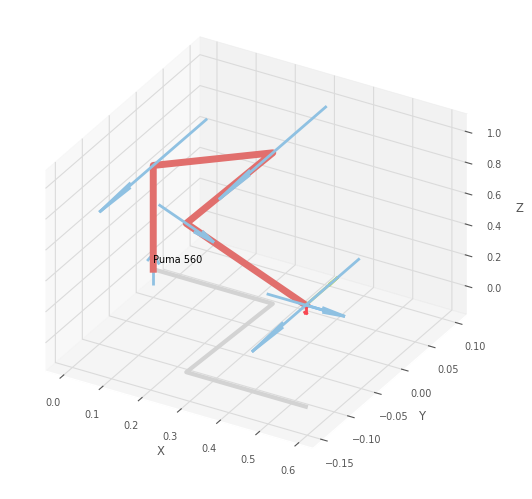

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Puma 560')

<Figure size 640x480 with 0 Axes>

In [2]:
p560 = rtb.models.DH.Puma560()
p560.plot(p560.qn, block=False)

In [3]:
"""
m 连杆质量
r 连杆质心矩阵
I 连杆惯性矩阵
Jm 电机惯量
B 电机粘性摩擦
Tc 电机库伦摩擦
G 传动比
"""

p560.dynamics()

┌───────┬───────┬─────────────────────────┬────────────────────────────────────────┬──────────┬───────────┬───────────────────┬───────┐
│   j   │   m   │            r            │                   I                    │    Jm    │     B     │        Tc         │   G   │
├───────┼───────┼─────────────────────────┼────────────────────────────────────────┼──────────┼───────────┼───────────────────┼───────┤
│ link1 │  0    │  0,  0,  0              │  0,  0.35,  0,  0,  0,  0              │  0.0002  │  0.00148  │  0.395, -0.435    │ -62.6 │
│ link2 │  17.4 │ -0.364,  0.006,  0.228  │  0.13,  0.524,  0.539,  0,  0,  0      │  0.0002  │  0.000817 │  0.126, -0.071    │  108  │
│ link3 │  4.8  │ -0.0203, -0.0141,  0.07 │  0.066,  0.086,  0.0125,  0,  0,  0    │  0.0002  │  0.00138  │  0.132, -0.105    │ -53.7 │
│ link4 │  0.82 │  0,  0.019,  0          │  0.0018,  0.0013,  0.0018,  0,  0,  0  │  3.3e-05 │  7.12e-05 │  0.0112, -0.0169  │  76   │
│ link5 │  0.34 │  0,  0,  0              │  0.0

In [4]:
p560.gravload(p560.qn)

array([       0,    31.64,    6.035,        0,  0.02825,        0])

In [5]:
p560.inertia(p560.qn)

array([[   3.659,  -0.4044,   0.1006, -0.002517,        0,        0],
       [ -0.4044,    4.414,   0.3509,        0,  0.00236,        0],
       [  0.1006,   0.3509,   0.9378,        0,  0.00148,        0],
       [-0.002517,        0,        0,   0.1925,        0, 2.828e-05],
       [       0,  0.00236,  0.00148,        0,   0.1713,        0],
       [       0,        0,        0, 2.828e-05,        0,   0.1941]])

In [11]:
q = symbol('q_:6')
p560.gravload(p560.qn)

array([       0,    31.64,    6.035,        0,  0.02825,        0])

In [12]:
qd = np.r_[0, 1, 0, 0, 0, 0]
p560.coriolis(p560.qn, qd) @ qd

array([  -0.567,        0,  -0.3858,        0, 4.134e-05,        0])

In [12]:
from sympy import symbols, cos, sin, simplify
from sympy.physics.mechanics import dynamicsymbols
from sympybotics import RobotDef
# , RigidBody
# from sympybotics import simplify_kinematic_equations

# 定义动力学符号
q1, q2 = symbols('q1 q2')

# 定义符号
l1, l2 = symbols('l1 l2')
d1, d2 = symbols('d1 d2')
r, alpha, beta = symbols('r alpha beta')

# 定义机器人参数
robot_def = RobotDef(
    '2R',
    [(q1, 0, l1, 0), (q2, 0, l2, 0)],
    dh_convention='mdh')

# 构建机器人模型
# rb = RigidBody('Link1', robot_def.dyn.base, robot_def.dyn.base_frame, 0, robot_def)
rb = robot

# 计算正运动学
T01 = rb.T[(q1,)]
T12 = rb.T[(q2,)]

# 合成正运动学矩阵
T02 = simplify(T01 * T12)

# 提取正运动学方程中的变量
T02 = T02.subs(robot_def.dyn.q[0], q1)
T02 = T02.subs(robot_def.dyn.q[1], q2)

# 提取正运动学方程中的变量
T02 = T02.subs(robot_def.dyn.frames[1].d, d1)
T02 = T02.subs(robot_def.dyn.frames[2].d, d2)

# 提取正运动学方程中的变量
T02 = T02.subs(robot_def.dyn.frames[1].r, r)
T02 = T02.subs(robot_def.dyn.frames[1].alpha, alpha)
T02 = T02.subs(robot_def.dyn.frames[1].beta, beta)

# 简化正运动学方程
T02 = simplify(T02)

print("正运动学解为：", T02)


AttributeError: 'DHRobot' object has no attribute 'T'

In [17]:
rb.fkine([q1,q2])

  -1.0*sin(q1)*sin(q2) + cos(q1)*cos(q2) -1.0*sin(q1)*cos(q2) - 1.0*sin(q2)*cos(q1) 0            l_1*cos(q1) - 1.0*l_2*sin(q1)*sin(q2) + l_2*cos(q1)*cos(q2)  
  sin(q1)*cos(q2) + 1.0*sin(q2)*cos(q1) -1.0*sin(q1)*sin(q2) + 1.0*cos(q1)*cos(q2) 0            l_1*sin(q1) + l_2*sin(q1)*cos(q2) + 1.0*l_2*sin(q2)*cos(q1)  
  0            0            1.00000000000000 0             
  0            0            0            1             


# RR两连杆符号解
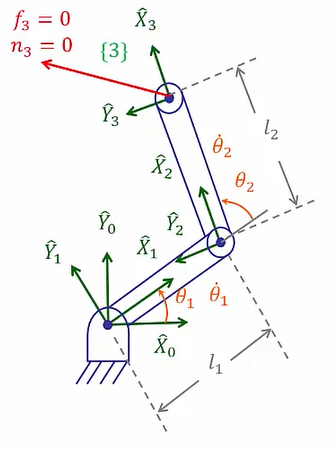
## 初始化

In [59]:
from re import I
from roboticstoolbox import DHRobot, RevoluteDH, ERobot, ELink, ETS,RevoluteMDH
from math import pi, sin, cos
import numpy as np
from spatialmath.base import symbol

g = symbol('g')
m1,m2 = symbol('m_1,m_2')
l1,l2 = symbol('l_1,l_2')
lc1,lc2 = symbol('l_c_1,l_c_2')
Izz1,Izz2 = symbol('Izz_1,Izz_2')

I1 = [0,0,0,0,0,0]
I2 = [0,0,0,0,0,0]

L1 = RevoluteMDH(a=0, m=m1, r=[l1/2, 0, 0], I=I1)
L2 = RevoluteMDH(a=l1, m=m2, alpha=pi/2,r=[l2/2, 0, 0], I=I2)

robot = DHRobot([L1, L2], gravity=[-g, 0, 0], symbolic=True)

print(robot)
print(robot.dynamics())

DHRobot: , 2 joints (RR), dynamics, modified DH parameters
┌──────┬───────┬─────┬─────┐
│ aⱼ₋₁ │ ⍺ⱼ₋₁  │ θⱼ  │ dⱼ  │
├──────┼───────┼─────┼─────┤
│    0 │  0.0° │  q1 │ 0.0 │
│  l_1 │ 90.0° │  q2 │ 0.0 │
└──────┴───────┴─────┴─────┘

┌──┬──┐
└──┴──┘

┌───────┬─────┬─────────────┬────────────────────────┬────┬────┬────────┬────┐
│   j   │  m  │      r      │           I            │ Jm │ B  │   Tc   │ G  │
├───────┼─────┼─────────────┼────────────────────────┼────┼────┼────────┼────┤
│ link1 │ m_1 │ l_1/2, 0, 0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│ link2 │ m_2 │ l_2/2, 0, 0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
└───────┴─────┴─────────────┴────────────────────────┴────┴────┴────────┴────┘

None


## 运动学

In [60]:
# 正运动学符号解
import spatialmath.base as base
from sympy import Matrix

q = symbol("q_1,q_2") # q = (q_1, q_2)
T = robot.fkine(q)
Ts = T.simplify()
M = Matrix(Ts.A)
M

Matrix([
[   -6.12323399573677e-17*sin(q_1)*sin(q_2) + cos(q_1)*cos(q_2),     -6.12323399573677e-17*sin(q_1)*cos(q_2) - sin(q_2)*cos(q_1),         1.0*sin(q_1),     l_1*cos(q_1)],
[1.0*sin(q_1)*cos(q_2) + 6.12323399573677e-17*sin(q_2)*cos(q_1), -1.0*sin(q_1)*sin(q_2) + 6.12323399573677e-17*cos(q_1)*cos(q_2),        -1.0*cos(q_1), 1.0*l_1*sin(q_1)],
[                                                  1.0*sin(q_2),                                                    1.0*cos(q_2), 6.12323399573677e-17,                0],
[                                                             0,                                                               0,                    0,                1]])

In [55]:
T1 = L1.A(q[0]) # 基坐标系到第一个关节的变换矩阵
T2 = L2.A(q[1]) # 第一个关节到第二个关节的变换矩阵
T = T1*T2
Ts = T2.simplify()
M = Matrix(Ts.A)
M


Matrix([
[                     cos(q_2),                     -sin(q_2),                    0, l_1],
[6.12323399573677e-17*sin(q_2), 6.12323399573677e-17*cos(q_2),                 -1.0,   0],
[                 1.0*sin(q_2),                  1.0*cos(q_2), 6.12323399573677e-17,   0],
[                            0,                             0,                    0,   1]])

In [56]:
# 差分运动学
J = robot.jacobe(q)
M = Matrix(simplify(J))
M

Matrix([
[6.12323399573677e-17*l_1*sin(q_2),   0],
[6.12323399573677e-17*l_1*cos(q_2),   0],
[                         -1.0*l_1,   0],
[                     1.0*sin(q_2),   0],
[                     1.0*cos(q_2),   0],
[             6.12323399573677e-17, 1.0]])

## 动力学

In [61]:
from sympy import trigsimp, simplify
q = symbol('q_1,q_2')
qd = symbol('qd_1,qd_2')
qdd = symbol('qdd_1,qdd_2')
tau = robot.rne_python(q, qd, qdd,gravity=[-g,0,0])
tau

array([l_1**2*m_1*qdd_1/2 + l_1*(-1.0*m_2*(-1.0*l_1*qdd_1 + 0.5*l_2*qd_1*(6.12323399573677e-17*qd_1 + qd_2)*sin(q_2) - l_2*(-1.0*qd_1*qd_2*sin(q_2) + 1.0*qdd_1*cos(q_2))/2) + 6.12323399573677e-17*m_2*(6.12323399573677e-17*l_1*qdd_1*cos(q_2) + 0.5*l_2*qd_1**2*sin(q_2)*cos(q_2) + l_2*(6.12323399573677e-17*qdd_1 + qdd_2)/2)*cos(q_2) + 6.12323399573677e-17*m_2*(g - l_1*qd_1**2 + 6.12323399573677e-17*l_1*qdd_1*sin(q_2) - 0.5*l_2*qd_1**2*cos(q_2)**2 - l_2*(6.12323399573677e-17*qd_1 + qd_2)**2/2)*sin(q_2)),
       0], dtype=object)

In [62]:
# %time 
M = Matrix(simplify(tau))
M

Matrix([
[l_1*(6.12323399573677e-17*g*m_2*sin(q_2) + 0.5*l_1*m_1*qdd_1 - 6.12323399573677e-17*l_1*m_2*qd_1**2*sin(q_2) + 1.0*l_1*m_2*qdd_1 - 3.06161699786838e-17*l_2*m_2*qd_1**2*sin(q_2) - 1.0*l_2*m_2*qd_1*qd_2*sin(q_2) - 3.06161699786838e-17*l_2*m_2*qd_2**2*sin(q_2) + 0.5*l_2*m_2*qdd_1*cos(q_2) + 3.06161699786838e-17*l_2*m_2*qdd_2*cos(q_2))],
[                                                                                                                                                                                                                                                                                                                                            0]])

In [63]:
tau_0 = tau[0].expand()
tau_1 = tau[1].expand()
tau_0

6.12323399573677e-17*g*l_1*m_2*sin(q_2) + l_1**2*m_1*qdd_1/2 - 6.12323399573677e-17*l_1**2*m_2*qd_1**2*sin(q_2) + 3.74939945665464e-33*l_1**2*m_2*qdd_1*sin(q_2)**2 + 3.74939945665464e-33*l_1**2*m_2*qdd_1*cos(q_2)**2 + 1.0*l_1**2*m_2*qdd_1 - 3.06161699786838e-17*l_1*l_2*m_2*qd_1**2*sin(q_2) - 1.0*l_1*l_2*m_2*qd_1*qd_2*sin(q_2) - 3.06161699786838e-17*l_1*l_2*m_2*qd_2**2*sin(q_2) + 0.5*l_1*l_2*m_2*qdd_1*cos(q_2) + 3.06161699786838e-17*l_1*l_2*m_2*qdd_2*cos(q_2)

In [64]:
m = tau_0.coeff(g).args
simplify(m)

(6.12323399573677e-17, l_1, m_2, sin(q_2))

In [50]:
6.16e-33*8.11e31

0.499576

# 三连杆符号解
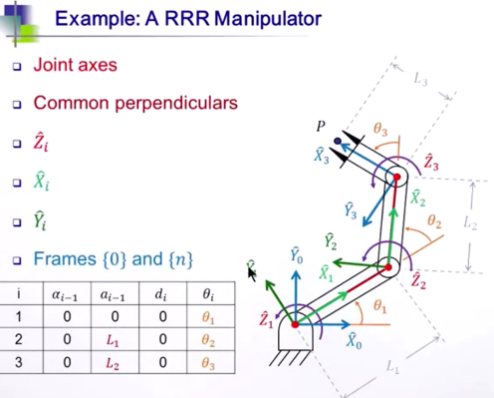
## 初始化

In [58]:
from roboticstoolbox import DHRobot, RevoluteDH, ERobot, ELink, ETS
from math import pi, sin, cos
import numpy as np
from spatialmath.base import symbol

# link 1
m1 = symbol('m_1')
l1 = symbol('l_1')
lc1 = symbol('l_c_1')

# link 2
m2 = symbol('m_2')
l2 = symbol('l_2')
lc2 = symbol('l_c_2')

# link 3
m3 = symbol('m_3')
l3 = symbol('l_3')
lc3 = symbol('l_c_3')

g = symbol('g')

'''L1 = RevoluteDH(a=l1, m=m1, r=[lc1, 0, 0])
L2 = RevoluteDH(a=l2, m=m2, r=[lc2, 0, 0])
L3 = RevoluteDH(a=l3, m=m3, r=[lc3, 0, 0])'''
L1 = RevoluteDH(a=l1, m=m1)
L2 = RevoluteDH(a=l2, m=m2)
L3 = RevoluteDH(a=l3, m=m3)
robot = DHRobot([L1, L2, L3], gravity=[g, 0, 0], symbolic=True)

print(robot)
print(robot.dynamics())

DHRobot: , 3 joints (RRR), dynamics, standard DH parameters
┌─────┬────┬─────┬──────┐
│ θⱼ  │ dⱼ │ aⱼ  │  ⍺ⱼ  │
├─────┼────┼─────┼──────┤
│  q1 │  0 │ l_1 │ 0.0° │
│  q2 │  0 │ l_2 │ 0.0° │
│  q3 │  0 │ l_3 │ 0.0° │
└─────┴────┴─────┴──────┘

┌──┬──┐
└──┴──┘

┌───────┬─────┬────────────┬────────────────────────┬────┬────┬────────┬────┐
│   j   │  m  │     r      │           I            │ Jm │ B  │   Tc   │ G  │
├───────┼─────┼────────────┼────────────────────────┼────┼────┼────────┼────┤
│ link1 │ m_1 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│ link2 │ m_2 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│ link3 │ m_3 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
└───────┴─────┴────────────┴────────────────────────┴────┴────┴────────┴────┘

None


## 运动学

In [59]:
# 正运动学符号解
import spatialmath.base as base
from sympy import Matrix

q = symbol("q_:3") # q = (q_1, q_2)
T = robot.fkine(q)
Ts = T.simplify()
M = Matrix(Ts.A)
M

Matrix([
[1.0*cos(q_0 + q_1 + q_2), -1.0*sin(q_0 + q_1 + q_2),   0, 1.0*l_1*cos(q_0) + 1.0*l_2*cos(q_0 + q_1) + 1.0*l_3*cos(q_0 + q_1 + q_2)],
[1.0*sin(q_0 + q_1 + q_2),  1.0*cos(q_0 + q_1 + q_2),   0, 1.0*l_1*sin(q_0) + 1.0*l_2*sin(q_0 + q_1) + 1.0*l_3*sin(q_0 + q_1 + q_2)],
[                       0,                         0, 1.0,                                                                        0],
[                       0,                         0,   0,                                                                        1]])

In [60]:
T1 = L1.A(q[0]) # 基坐标系到第一个关节的变换矩阵
T2 = L2.A(q[1]) # 第一个关节到第二个关节的变换矩阵
T = T1*T2
Ts = T.simplify()
M = Matrix(Ts.A)
M

Matrix([
[1.0*cos(q_0 + q_1), -1.0*sin(q_0 + q_1),   0, 1.0*l_1*cos(q_0) + 1.0*l_2*cos(q_0 + q_1)],
[1.0*sin(q_0 + q_1),  1.0*cos(q_0 + q_1),   0, 1.0*l_1*sin(q_0) + 1.0*l_2*sin(q_0 + q_1)],
[                 0,                   0, 1.0,                                         0],
[                 0,                   0,   0,                                         1]])

In [45]:
# 符号解转为python格式
from sympy import ccode, pycode, octave_code
print(pycode(M[0,0]))

1.0*math.cos(q_0 + q_1)


In [46]:
# 符号解转为数值解
from sympy import lambdify
T_func = lambdify(q, M, modules='numpy')
T_func(0.5*np.pi, 0, np.pi)

array([[6.123233995736766e-17, -1.0, 0,
        6.12323399573677e-17*l_1 + 6.12323399573677e-17*l_2],
       [1.0, 6.123233995736766e-17, 0, 1.0*l_1 + 1.0*l_2],
       [0, 0, 1.0, 0],
       [0, 0, 0, 1]], dtype=object)

In [61]:
# 差分运动学
from sympy import trigsimp, simplify
J = robot.jacob0(q)
M = Matrix(simplify(J))
M

Matrix([
[-1.0*l_1*sin(q_0) - 1.0*l_2*sin(q_0 + q_1) - 1.0*l_3*sin(q_0 + q_1 + q_2), -1.0*l_2*sin(q_0 + q_1) - 1.0*l_3*sin(q_0 + q_1 + q_2), -1.0*l_3*sin(q_0 + q_1 + q_2)],
[ 1.0*l_1*cos(q_0) + 1.0*l_2*cos(q_0 + q_1) + 1.0*l_3*cos(q_0 + q_1 + q_2),  1.0*l_2*cos(q_0 + q_1) + 1.0*l_3*cos(q_0 + q_1 + q_2),  1.0*l_3*cos(q_0 + q_1 + q_2)],
[                                                                        0,                                                      0,                             0],
[                                                                        0,                                                      0,                             0],
[                                                                        0,                                                      0,                             0],
[                                                                      1.0,                                                    1.0,                           1.0]])

---
## 动力学
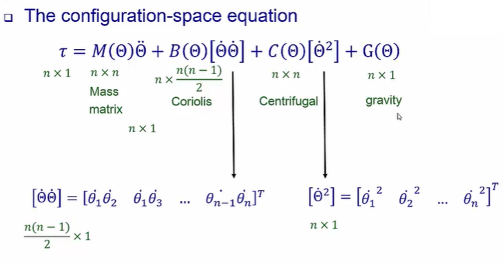

In [62]:
q = symbol('q_:3')
qd = symbol('qd_:3')
qdd = symbol('qdd_:3')
tau = robot.rne_python(q, qd, qdd)
tau

array([1.0*l_1*m_1*(1.0*g*sin(q_0) + 1.0*l_1*qdd_0) + 1.0*l_1*(m_2*(-l_2*(1.0*qd_0 + 1.0*qd_1)**2 + (1.0*g*sin(q_0) + 1.0*l_1*qdd_0)*sin(q_1) + (-g*cos(q_0) - 1.0*l_1*qd_0**2)*cos(q_1)) + m_3*(-l_3*(1.0*qd_0 + 1.0*qd_1 + 1.0*qd_2)**2 + (-l_2*(1.0*qd_0 + 1.0*qd_1)**2 + (1.0*g*sin(q_0) + 1.0*l_1*qdd_0)*sin(q_1) + (-g*cos(q_0) - 1.0*l_1*qd_0**2)*cos(q_1))*cos(q_2) + (l_2*(1.0*qdd_0 + 1.0*qdd_1) + 1.0*(1.0*g*sin(q_0) + 1.0*l_1*qdd_0)*cos(q_1) - 1.0*(-g*cos(q_0) - 1.0*l_1*qd_0**2)*sin(q_1))*sin(q_2))*cos(q_2) - 1.0*m_3*(l_3*(1.0*qdd_0 + 1.0*qdd_1 + 1.0*qdd_2) - 1.0*(-l_2*(1.0*qd_0 + 1.0*qd_1)**2 + (1.0*g*sin(q_0) + 1.0*l_1*qdd_0)*sin(q_1) + (-g*cos(q_0) - 1.0*l_1*qd_0**2)*cos(q_1))*sin(q_2) + 1.0*(l_2*(1.0*qdd_0 + 1.0*qdd_1) + 1.0*(1.0*g*sin(q_0) + 1.0*l_1*qdd_0)*cos(q_1) - 1.0*(-g*cos(q_0) - 1.0*l_1*qd_0**2)*sin(q_1))*cos(q_2))*sin(q_2))*sin(q_1) + 1.0*l_1*(m_2*(l_2*(1.0*qdd_0 + 1.0*qdd_1) + 1.0*(1.0*g*sin(q_0) + 1.0*l_1*qdd_0)*cos(q_1) - 1.0*(-g*cos(q_0) - 1.0*l_1*qd_0**2)*sin(q_1)) + m_3

In [63]:
# %time 
M = Matrix(simplify(tau))
M

KeyboardInterrupt: 

In [ ]:
tau_0 = tau[0].expand()
tau_1 = tau[1].expand()
tau_2 = tau[2].expand()

In [ ]:
tau_0

-1.0*g*l_1*m_1*cos(q_0) - 1.0*g*l_1*m_2*sin(q_1)**2*cos(q_0) - 1.0*g*l_1*m_2*cos(q_0)*cos(q_1)**2 - 1.0*g*l_1*m_3*sin(q_1)**2*sin(q_2)**2*cos(q_0) - 1.0*g*l_1*m_3*sin(q_1)**2*cos(q_0)*cos(q_2)**2 - 1.0*g*l_1*m_3*sin(q_2)**2*cos(q_0)*cos(q_1)**2 - 1.0*g*l_1*m_3*cos(q_0)*cos(q_1)**2*cos(q_2)**2 + 1.0*g*l_2*m_2*sin(q_0)*sin(q_1) - 1.0*g*l_2*m_2*cos(q_0)*cos(q_1) + 1.0*g*l_2*m_3*sin(q_0)*sin(q_1)*sin(q_2)**2 + 1.0*g*l_2*m_3*sin(q_0)*sin(q_1)*cos(q_2)**2 - 1.0*g*l_2*m_3*sin(q_2)**2*cos(q_0)*cos(q_1) - 1.0*g*l_2*m_3*cos(q_0)*cos(q_1)*cos(q_2)**2 + 1.0*g*l_3*m_3*sin(q_0)*sin(q_1)*cos(q_2) + 1.0*g*l_3*m_3*sin(q_0)*sin(q_2)*cos(q_1) + 1.0*g*l_3*m_3*sin(q_1)*sin(q_2)*cos(q_0) - 1.0*g*l_3*m_3*cos(q_0)*cos(q_1)*cos(q_2) + 1.0*l_1**2*m_1*qdd_0 + 1.0*l_1**2*m_2*qdd_0*sin(q_1)**2 + 1.0*l_1**2*m_2*qdd_0*cos(q_1)**2 + 1.0*l_1**2*m_3*qdd_0*sin(q_1)**2*sin(q_2)**2 + 1.0*l_1**2*m_3*qdd_0*sin(q_1)**2*cos(q_2)**2 + 1.0*l_1**2*m_3*qdd_0*sin(q_2)**2*cos(q_1)**2 + 1.0*l_1**2*m_3*qdd_0*cos(q_1)**2*cos(q_2)**2 -

### mass matrix
nxn

In [ ]:
# mass matrix M00
m = tau_0.coeff(qdd[0]).args
simplify(m)

(1.0*l_1**2*m_1, 1.0*l_2**2*m_2, 1.0*l_3**2*m_3, 1.0*l_1**2*m_2*cos(q_1)**2, 1.0*l_1**2*m_2*sin(q_1)**2, 1.0*l_2**2*m_3*cos(q_2)**2, 1.0*l_2**2*m_3*sin(q_2)**2, 1.0*l_1**2*m_3*cos(q_1)**2*cos(q_2)**2, 1.0*l_1**2*m_3*sin(q_2)**2*cos(q_1)**2, 1.0*l_1**2*m_3*sin(q_1)**2*cos(q_2)**2, 1.0*l_1**2*m_3*sin(q_1)**2*sin(q_2)**2, 2.0*l_1*l_2*m_2*cos(q_1), 2.0*l_2*l_3*m_3*cos(q_2), 2.0*l_1*l_2*m_3*cos(q_1)*cos(q_2)**2, 2.0*l_1*l_2*m_3*sin(q_2)**2*cos(q_1), 2.0*l_1*l_3*m_3*cos(q_1)*cos(q_2), -2.0*l_1*l_3*m_3*sin(q_1)*sin(q_2))

In [41]:
m

(1.0*l_1**2*m_1,
 1.0*l_2**2*m_2,
 1.0*l_3**2*m_3,
 1.0*l_1**2*m_2*cos(q_1)**2,
 1.0*l_1**2*m_2*sin(q_1)**2,
 1.0*l_2**2*m_3*cos(q_2)**2,
 1.0*l_2**2*m_3*sin(q_2)**2,
 1.0*l_1**2*m_3*cos(q_1)**2*cos(q_2)**2,
 1.0*l_1**2*m_3*sin(q_2)**2*cos(q_1)**2,
 1.0*l_1**2*m_3*sin(q_1)**2*cos(q_2)**2,
 1.0*l_1**2*m_3*sin(q_1)**2*sin(q_2)**2,
 2.0*l_1*l_2*m_2*cos(q_1),
 2.0*l_2*l_3*m_3*cos(q_2),
 2.0*l_1*l_2*m_3*cos(q_1)*cos(q_2)**2,
 2.0*l_1*l_2*m_3*sin(q_2)**2*cos(q_1),
 2.0*l_1*l_3*m_3*cos(q_1)*cos(q_2),
 -2.0*l_1*l_3*m_3*sin(q_1)*sin(q_2))

In [9]:
# mass matrix M01
m = tau_0.coeff(qdd[1]).args
simplify(m)

(1.0*l_2**2*m_2, 1.0*l_c_2**2*m_2, -2.0*l_2*l_c_2*m_2, 1.0*l_1*l_2*m_2*cos(q_1), -1.0*l_1*l_c_2*m_2*cos(q_1))

In [10]:
# mass matrix M10
m = tau_1.coeff(qdd[0]).args
simplify(m)

(1.0*l_2**2*m_2, 1.0*l_c_2**2*m_2, -2.0*l_2*l_c_2*m_2, 1.0*l_1*l_2*m_2*cos(q_1), -1.0*l_1*l_c_2*m_2*cos(q_1))

In [11]:
# mass matrix M11
m = tau_1.coeff(qdd[1]).args
simplify(m)

(1.0*l_2**2*m_2, 1.0*l_c_2**2*m_2, -2.0*l_2*l_c_2*m_2)

### codiolis

In [ ]:
m = tau_0.coeff(qd[0]).coeff(qd[1]).args
simplify(m)

(-2.0*l_1*l_2*m_2*sin(q_1), -2.0*l_1*l_2*m_3*sin(q_1)*cos(q_2)**2, -2.0*l_1*l_2*m_3*sin(q_1)*sin(q_2)**2, -2.0*l_1*l_3*m_3*sin(q_2)*cos(q_1), -2.0*l_1*l_3*m_3*sin(q_1)*cos(q_2))

In [52]:
m = tau_1.coeff(qd[0]).coeff(qd[1]).args
simplify(m)

()

### centrifugal

In [53]:
m = tau_0.coeff(qd[0]).coeff(qd[0]).args
simplify(m)

()

In [54]:
m = tau_0.coeff(qd[1]).coeff(qd[1]).args
simplify(m)

()

In [55]:
m = tau_1.coeff(qd[0]).coeff(qd[0]).args
simplify(m)

()

In [57]:
m = tau_1.coeff(qd[1]).coeff(qd[1]).args
simplify(m)

(-2.0, l_2, l_3, m_3, qd_2, sin(q_2))

### gravity

In [22]:
m = tau_0.coeff(g).args
simplify(m)

(-l_1*m_1, -1.0*l_1*m_2*cos(q_2))

## 动力学_拉格朗日法

In [111]:
from roboticstoolbox import DHRobot, RevoluteDH
import sympy as sp
from spatialmath import SE3
import numpy as np

# 定义符号变量
q1, q2, q3 = sp.symbols('q1 q2 q3')
dq1, dq2, dq3 = sp.symbols('dq1 dq2 dq3')
ddq1, ddq2, ddq3 = sp.symbols('ddq1 ddq2 ddq3')
d1, a2, a3 = sp.symbols('d1 a2 a3')  # 定义DH参数的符号变量
m1, m2, m3 = sp.symbols('m1 m2 m3')  # 各个关节的质量
g = sp.symbols('g')  # 重力加速度
I1, I2, I3 = sp.symbols('I1 I2 I3')  # 惯性张量

# 创建RRR机械臂的DH参数
L1 = RevoluteDH(d=d1, a=0, alpha=0, m=m1)
L2 = RevoluteDH(d=0, a=a2, alpha=0, m=m2)
L3 = RevoluteDH(d=0, a=a3, alpha=0, m=m3)

# 创建机械臂模型
rrr = DHRobot([L1, L2, L3], name='RRR')

# 定义状态变量
q = sp.Matrix([q1, q2, q3])
dq = sp.Matrix([dq1, dq2, dq3])
ddq = sp.Matrix([ddq1, ddq2, ddq3])

# 计算惯性矩阵M
M = rrr.inertia(q)
# 计算科里奥利矩阵C
C = rrr.coriolis(q, dq)
# 计算重力向量G
G = rrr.gravload(q, grav=sp.Matrix([0, 0, g]))

# 输出结果
M, C, G


TypeError: argument must be scalar or ndarray

In [ ]:
.inertia

In [91]:
from re import I
import sympy as sp
from roboticstoolbox import DHRobot, RevoluteDH
from spatialmath import SE3

# 定义符号变量
q1, q2, q3 = sp.symbols('q1 q2 q3')
q1d, q2d, q3d = sp.symbols('q1d q2d q3d')
q1dd, q2dd, q3dd = sp.symbols('q1dd q2dd q3dd')
m1, m2, m3, l1, l2, l3, I1, I2, I3 = sp.symbols('m1 m2 m3 l1 l2 l3 I1 I2 I3')
g = sp.symbols('g')

# 创建3DOF机械臂
robot = DHRobot([
    RevoluteDH(a=l1, m=m1),
    RevoluteDH(a=l2, m=m2),
    RevoluteDH(a=l3, m=m3)
])

# 设置机械臂的符号变量
robot.q = [q1, q2, q3]
print(robot)
print(robot.dynamics())

DHRobot: , 3 joints (RRR), dynamics, standard DH parameters
┌─────┬────┬────┬──────┐
│ θⱼ  │ dⱼ │ aⱼ │  ⍺ⱼ  │
├─────┼────┼────┼──────┤
│  q1 │  0 │ l1 │ 0.0° │
│  q2 │  0 │ l2 │ 0.0° │
│  q3 │  0 │ l3 │ 0.0° │
└─────┴────┴────┴──────┘

┌──┬──┐
└──┴──┘

┌───────┬────┬────────────┬────────────────────────┬────┬────┬────────┬────┐
│   j   │ m  │     r      │           I            │ Jm │ B  │   Tc   │ G  │
├───────┼────┼────────────┼────────────────────────┼────┼────┼────────┼────┤
│ link1 │ m1 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│ link2 │ m2 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│ link3 │ m3 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
└───────┴────┴────────────┴────────────────────────┴────┴────┴────────┴────┘

None


In [103]:
# 计算变换矩阵
T1 = robot[0].A(q1)  # 第一关节的变换矩阵
T2 = T1 * robot[1].A(q2)  # 第二关节的变换矩阵
T3 = T2 * robot[2].A(q3)  # 第三关节的变换矩阵

# 提取各关节位置
P1 = T1.t
P2 = T2.t
P3 = T3.t

# 计算雅可比矩阵
J1 = sp.Matrix([[sp.diff(P1[i], q) for q in (q1, q2, q3)] for i in range(3)])
J2 = sp.Matrix([[sp.diff(P2[i], q) for q in (q1, q2, q3)] for i in range(3)])
J3 = sp.Matrix([[sp.diff(P3[i], q) for q in (q1, q2, q3)] for i in range(3)])


In [104]:
# 计算末端速度
v1 = J1 * sp.Matrix([q1d, q2d, q3d])
v2 = J2 * sp.Matrix([q1d, q2d, q3d])
v3 = J3 * sp.Matrix([q1d, q2d, q3d])

# 动能
T1 = (1/2) * m1 * v1.dot(v1) + (1/2) * I1 * q1d**2
T2 = (1/2) * m2 * v2.dot(v2) + (1/2) * I2 * q2d**2
T3 = (1/2) * m3 * v3.dot(v3) + (1/2) * I3 * q3d**2
T = T1 + T2 + T3

# 势能
V1 = m1 * g * P1[2]
V2 = m2 * g * P2[2]
V3 = m3 * g * P3[2]
V = V1 + V2 + V3

# 拉格朗日函数
L = T - V

# 拉格朗日方程
tau1 = sp.diff(sp.diff(L, q1d), 't').doit() - sp.diff(L, q1)
tau2 = sp.diff(sp.diff(L, q2d), 't').doit() - sp.diff(L, q2)
tau3 = sp.diff(sp.diff(L, q3d), 't').doit() - sp.diff(L, q3)

# 动力学方程
tau1 = tau1.simplify()
tau2 = tau2.simplify()
tau3 = tau3.simplify()


In [105]:
# 提取惯性矩阵
M11 = sp.diff(tau1, q1dd).simplify()
M12 = sp.diff(tau1, q2dd).simplify()
M13 = sp.diff(tau1, q3dd).simplify()

M21 = sp.diff(tau2, q1dd).simplify()
M22 = sp.diff(tau2, q2dd).simplify()
M23 = sp.diff(tau2, q3dd).simplify()

M31 = sp.diff(tau3, q1dd).simplify()
M32 = sp.diff(tau3, q2dd).simplify()
M33 = sp.diff(tau3, q3dd).simplify()

M = sp.Matrix([[M11, M12, M13], [M21, M22, M23], [M31, M32, M33]])

print("Inertia Matrix M:")
sp.pprint(M)


Inertia Matrix M:
⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦


In [109]:
tau3

1.0*l3*m3*(1.0*l1*q1d**2*sin(q2 + q3) + 1.0*l1*q1d*q2d*sin(q2 + q3) + 1.0*l1*q1d*q3d*sin(q2 + q3) + 1.0*l2*q1d**2*sin(q3) + 2.0*l2*q1d*q2d*sin(q3) + 1.0*l2*q1d*q3d*sin(q3) + 1.0*l2*q2d**2*sin(q3) + 1.0*l2*q2d*q3d*sin(q3))